In [37]:
import geopandas
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import sklearn
import re
%matplotlib inline

In [38]:
import re
import os
import datetime
from datetime import datetime
import seaborn as sns
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 
import sys
sys.tracebacklimit = 2

In [39]:
workdir = os.getcwd()
average_travel_file = "\data\Average Travel time by departure time.xlsx"
path = os.path.join(workdir+average_travel_file)

avg_commute = pd.read_excel(path,header = 4)
avg_commute.fillna(0)

def clean_locations(string):
    return re.findall("(?<=--)(.*)(?= PUMA)",string)[0]

avg_commute['Selected Geographies'] = avg_commute['Selected Geographies'].apply(lambda x: clean_locations(x))

drop_col = avg_commute.columns[1]

avg_commute.drop([drop_col],axis=1,inplace=True)
avg_commute.fillna(np.NaN,inplace=True)
avg_commute

,Selected Geographies,12:00 a.m. to 12:29 a.m.,12:30 a.m. to 12:59 a.m.,1:00 a.m. to 1:29 a.m.,1:30 a.m. to 1:59 a.m.,2:00 a.m. to 2:29 a.m.,2:30 a.m. to 2:59 a.m.,3:00 a.m. to 3:09 a.m.,3:10 a.m. to 3:19 a.m.,3:20 a.m. to 3:29 a.m.,...,9:40 p.m. to 9:49 p.m.,9:50 p.m. to 9:59 p.m.,10:00 p.m. to 10:09 p.m.,10:10 p.m. to 10:19 p.m.,10:20 p.m. to 10:29 p.m.,10:30 p.m. to 10:39 p.m.,10:40 p.m. to 10:49 p.m.,10:50 p.m. to 10:59 p.m.,11:00 p.m. to 11:29 p.m.,11:30 p.m. to 11:59 p.m.
0,Castaic,45.0,NaN,12.0,NaN,60.0,124.0,47.0,NaN,NaN,...,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santa Clarita City,142.0,NaN,85.0,NaN,58.0,NaN,29.0,NaN,NaN,...,NaN,30.0,17.0,NaN,NaN,35.0,NaN,NaN,30.0,15.0
2,Lancaster City,NaN,45.0,NaN,60.0,NaN,NaN,91.0,12.0,NaN,...,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,50.0,15.0
3,Palmdale City,10.0,50.0,NaN,90.0,57.0,15.0,83.0,NaN,62.0,...,NaN,NaN,45.0,NaN,80.0,NaN,NaN,NaN,142.0,20.0
4,LA City (Northwest/Chatsworth & Porter Ranch),15.0,10.0,NaN,40.0,NaN,NaN,38.0,NaN,NaN,...,NaN,NaN,15.0,NaN,40.0,29.0,10.0,NaN,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Long Beach City (East),19.0,35.0,NaN,105.0,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN
65,Long Beach City (Southwest & Port),NaN,NaN,18.0,NaN,142.0,NaN,NaN,17.0,NaN,...,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,LA City (South/San Pedro),15.0,NaN,20.0,15.0,30.0,30.0,31.0,NaN,16.0,...,NaN,NaN,15.0,NaN,NaN,30.0,7.0,5.0,20.0,5.0
67,Palos Verdes Peninsula,NaN,NaN,NaN,83.0,NaN,10.0,14.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
splits = []
for city in avg_commute['Selected Geographies']:
    if re.match("\w", city):
        sublist = re.split('[^\s|\w]',city)
        for item in sublist:
            if item != None:
                if 'Cities' in item:
                    item = item.strip('Cities')
                    splits.append(item)
                if "Region" in item:
                    item = item.strip('Region')
                    splits.append(item)
                else:
                    splits.append(item)
    else:
        splits.append(city)    


semi_cleaned = list(set(splits))
semi_cleaned.remove('')
semi_cleaned.remove('North')
semi_cleaned.remove('Northeast')
semi_cleaned.remove('East')
semi_cleaned.remove('Southeast')
semi_cleaned.remove('South')
semi_cleaned.remove('Southwest')
#semi_cleaned.remove('West')
semi_cleaned.remove('Northwest')
semi_cleaned.remove("Central")

cleaned = [x.strip() for x in semi_cleaned]

df = pd.DataFrame(index = avg_commute.columns[1:])
for city in cleaned:
    for geo in avg_commute['Selected Geographies']:
        if city in geo:
            df[city] = avg_commute[avg_commute['Selected Geographies'] == geo].values[:,1:].T
        
commute_by_city = df.transpose()
commute_by_city

C:\Users\mcran\AppData\Local\Temp\ipykernel_13284\1659466977.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[city] = avg_commute[avg_commute['Selected Geographies'] == geo].values[:,1:].T
C:\Users\mcran\AppData\Local\Temp\ipykernel_13284\1659466977.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[city] = avg_commute[avg_commute['Selected Geographies'] == geo].values[:,1:].T
C:\Users\mcran\AppData\Local\Temp\ipykernel_13284\1659466977.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

,12:00 a.m. to 12:29 a.m.,12:30 a.m. to 12:59 a.m.,1:00 a.m. to 1:29 a.m.,1:30 a.m. to 1:59 a.m.,2:00 a.m. to 2:29 a.m.,2:30 a.m. to 2:59 a.m.,3:00 a.m. to 3:09 a.m.,3:10 a.m. to 3:19 a.m.,3:20 a.m. to 3:29 a.m.,3:30 a.m. to 3:39 a.m.,...,9:40 p.m. to 9:49 p.m.,9:50 p.m. to 9:59 p.m.,10:00 p.m. to 10:09 p.m.,10:10 p.m. to 10:19 p.m.,10:20 p.m. to 10:29 p.m.,10:30 p.m. to 10:39 p.m.,10:40 p.m. to 10:49 p.m.,10:50 p.m. to 10:59 p.m.,11:00 p.m. to 11:29 p.m.,11:30 p.m. to 11:59 p.m.
Baldwin Park,20.0,46.0,NaN,142.0,27.0,23.0,32.0,NaN,NaN,26.0,...,NaN,NaN,40.0,NaN,NaN,30.0,NaN,NaN,NaN,15.0
Westlake Village,10.0,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,...,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Hollywood,22.0,NaN,54.0,NaN,142.0,32.0,29.0,NaN,NaN,NaN,...,NaN,NaN,24.0,NaN,NaN,20.0,10.0,NaN,52.0,NaN
Van Nuys,33.0,45.0,27.0,NaN,45.0,NaN,60.0,NaN,NaN,25.0,...,30.0,NaN,16.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
Glassell Park,17.0,NaN,21.0,5.0,29.0,17.0,24.0,NaN,NaN,22.0,...,2.0,NaN,NaN,NaN,40.0,NaN,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
North Sherman Oaks,33.0,45.0,27.0,NaN,45.0,NaN,60.0,NaN,NaN,25.0,...,30.0,NaN,16.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
Mid,9.0,20.0,39.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Santa Clarita City,142.0,NaN,85.0,NaN,58.0,NaN,29.0,NaN,NaN,20.0,...,NaN,30.0,17.0,NaN,NaN,35.0,NaN,NaN,30.0,15.0
Gardena,15.0,NaN,26.0,NaN,19.0,44.0,25.0,NaN,NaN,17.0,...,NaN,NaN,8.0,15.0,NaN,NaN,10.0,NaN,20.0,NaN


In [179]:
def clean_time(string):
    temp = re.findall("[\d]{1,2}:[\d]{2}[\s][\w][.][\w][.]",string)[0]
    time = temp.split(" ")
    time[1] = time[1].upper().replace(".","")
    stringy = " ".join(time)
    return stringy

commute_by_city

old_cols = list(commute_by_city.columns.values)
new_cols = pd.Series(old_cols).apply(lambda x: clean_time(x))
new_cols = pd.to_datetime(new_cols, format="%I:%M %p").dt.strftime('%H:%M')
commute_by_city.set_axis(new_cols,axis=1,inplace= True)

avg_T = commute_by_city.transpose()
avg_T.index = pd.to_datetime(avg_T.index)
avg_T = avg_T.resample('10T').sum()
avg_T.index = pd.to_datetime(avg_T.index).strftime('%H:%M')
avg_T

,Baldwin Park,Westlake Village,North Hollywood,Van Nuys,Glassell Park,West Central,,Pasadena City,Arleta,Inglewood City,...,Wilshire,Westchester,West Adams,Long Beach City,Duarte,North Sherman Oaks,Mid,Santa Clarita City,Gardena,La Verne
00:00,20.0,10.0,22.0,33.0,17.0,16.0,0.0,35.0,10.0,24.0,...,9.0,0.0,0.0,0.0,20.0,33.0,9.0,142.0,15.0,5.0
00:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:30,46.0,0.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,46.0,45.0,20.0,0.0,0.0,0.0
00:40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:50,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23:00,0.0,0.0,52.0,0.0,0.0,10.0,0.0,30.0,34.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,20.0,30.0
23:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [238]:
morning = avg_T.loc["01:30":"12:00"]
morning.replace(0,np.nan,inplace=True)
morning = morning.apply(lambda x: x.interpolate(option='nearest',limit_direction='backward'))
morning

C:\Users\mcran\AppData\Local\Temp\ipykernel_13284\447979091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning.replace(0,np.nan,inplace=True)


,Baldwin Park,Westlake Village,North Hollywood,Van Nuys,Glassell Park,West Central,,Pasadena City,Arleta,Inglewood City,...,Wilshire,Westchester,West Adams,Long Beach City,Duarte,North Sherman Oaks,Mid,Santa Clarita City,Gardena,La Verne
01:30,142.000000,35.00,142.000000,45.000000,5.0,15.0,25.0,45.0,13.000000,30.000000,...,90.000000,10.000000,20.000000,142.000000,142.000000,45.000000,90.000000,58.000000,19.000000,30.0
01:40,103.666667,35.00,142.000000,45.000000,13.0,15.0,25.0,45.0,13.000000,36.666667,...,85.533333,10.000000,20.000000,142.000000,103.666667,45.000000,85.533333,58.000000,19.000000,30.0
01:50,65.333333,35.00,142.000000,45.000000,21.0,15.0,25.0,45.0,13.000000,43.333333,...,81.066667,10.000000,20.000000,142.000000,65.333333,45.000000,81.066667,58.000000,19.000000,30.0
02:00,27.000000,35.00,142.000000,45.000000,29.0,15.0,25.0,45.0,13.000000,50.000000,...,76.600000,10.000000,20.000000,142.000000,27.000000,45.000000,76.600000,58.000000,19.000000,30.0
02:10,25.666667,35.00,105.333333,47.500000,25.0,15.0,22.0,45.0,15.333333,56.666667,...,72.133333,10.000000,24.166667,124.142857,25.666667,47.500000,72.133333,53.166667,27.333333,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11:20,26.000000,27.50,23.666667,38.666667,30.0,30.0,25.0,25.0,19.666667,103.666667,...,38.500000,6.000000,55.333333,41.666667,26.000000,38.666667,38.500000,58.000000,34.666667,7.5
11:30,32.000000,28.25,25.000000,42.000000,45.0,15.0,22.0,56.0,22.000000,142.000000,...,32.000000,18.000000,60.000000,25.000000,32.000000,42.000000,32.000000,56.000000,46.000000,10.0
11:40,15.000000,29.00,25.000000,47.000000,41.0,12.5,5.0,8.0,16.000000,108.000000,...,15.000000,21.333333,49.333333,29.333333,15.000000,47.000000,15.000000,57.333333,33.666667,7.0
11:50,24.000000,10.00,25.000000,52.000000,37.0,10.0,17.5,10.0,10.000000,74.000000,...,20.500000,24.666667,38.666667,33.666667,24.000000,52.000000,20.500000,58.666667,21.333333,4.0


01:30    64.044444
01:40    62.426667
01:50    61.456000
02:00    60.873600
02:10    60.524160
           ...    
11:20    20.670166
11:30    19.735433
11:40    17.841260
11:50    16.704756
12:00    20.222854
Length: 64, dtype: float64


c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)


39883.226702226035

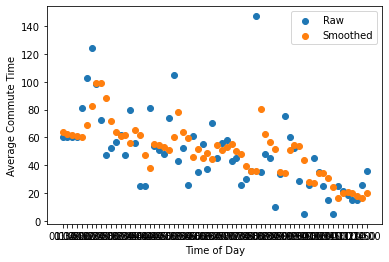

In [338]:
plt.scatter(morning.index,morning['Castaic'], label='Raw')
fit1 = SimpleExpSmoothing(morning['Castaic'], initialization_method="heuristic").fit(smoothing_level=0.4, optimized=False)
print(fit1.fittedvalues)
plt.scatter(morning.index,fit1.fittedvalues, label='Smoothed')
plt.ylabel('Average Commute Time')
plt.xlabel('Time of Day')
plt.plot()
plt.legend()
fit1.sse

In [242]:
best_smoothing = pd.DataFrame(columns = morning.columns)
for i in range(9):
    smooth = 0.1 + i/10
    fit = morning.apply(lambda x: SimpleExpSmoothing(x, initialization_method="heuristic").fit(smoothing_level=smooth, optimized=False).sse)
    best_smoothing = best_smoothing.append(fit, ignore_index=True)
best_smoothing

c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequenc

,Baldwin Park,Westlake Village,North Hollywood,Van Nuys,Glassell Park,West Central,,Pasadena City,Arleta,Inglewood City,...,Wilshire,Westchester,West Adams,Long Beach City,Duarte,North Sherman Oaks,Mid,Santa Clarita City,Gardena,La Verne
0,76439.132266,44117.116335,113393.442834,22438.764639,43155.031767,18241.299441,16342.565657,21312.296593,23167.411923,55563.132375,...,27533.868709,23875.983232,23415.097109,97759.479489,76439.132266,22438.764639,27533.868709,39558.627504,14169.651938,23105.627424
1,60850.426788,42277.036119,65759.800131,23028.844196,37704.097377,16428.781215,15011.572521,20499.620997,20766.399030,50756.100346,...,16854.845444,19023.200531,20014.791673,57960.145052,60850.426788,23028.844196,16854.845444,33590.738001,12958.888868,20341.684662
2,56275.181653,42349.991173,49674.488618,23852.259304,36615.846728,16413.793531,14968.406872,20410.827730,21029.383745,46941.215137,...,13179.008967,18081.827248,19132.883440,45763.227024,56275.181653,23852.259304,13179.008967,30018.320562,12715.783368,19843.106836
3,55735.882281,42846.977914,42631.150288,24943.820164,37260.505895,16743.765427,15436.906968,20657.658785,22138.291489,44316.420763,...,11670.639840,18424.626503,18953.309783,40447.316158,55735.882281,24943.820164,11670.639840,28085.136771,12799.174025,20124.868861
4,57199.417798,43512.881073,39438.464977,26267.595893,38969.207002,17168.148767,16102.398249,21137.660707,23692.833489,42491.729031,...,11083.826376,19356.912887,19077.403644,37774.303813,57199.417798,26267.595893,11083.826376,27106.473686,13055.395886,20809.537699
5,59918.800916,44359.428517,38229.407698,27816.876545,41521.303506,17657.996924,16840.212819,21866.640236,25592.032173,41212.902385,...,10983.663695,20670.876076,19408.474727,36335.724727,59918.800916,27816.876545,10983.663695,26735.706925,13447.303432,21756.146772
6,63573.973445,45460.466216,38218.810440,29612.370585,44848.297190,18228.797434,17609.102915,22891.385105,27824.209254,40403.056214,...,11198.279267,22309.234032,19928.750035,35584.907043,63573.973445,29612.370585,11198.279267,26820.880095,13976.477341,22925.615585
7,68004.222493,46899.363417,39053.622855,31691.403507,48957.433086,18902.743287,18414.390577,24265.518870,30416.279197,40079.173245,...,11660.644379,24273.609022,20644.714855,35303.803710,68004.222493,31691.403507,11660.644379,27314.495539,14660.067824,24340.084134
8,73111.540541,48749.639009,40571.114571,34100.446493,53903.256825,19703.831884,19289.274423,26045.665395,33422.722371,40298.321210,...,12355.926615,26597.887397,21574.335571,35421.542994,73111.540541,34100.446493,12355.926615,28232.982462,15522.969328,26062.337076


[]

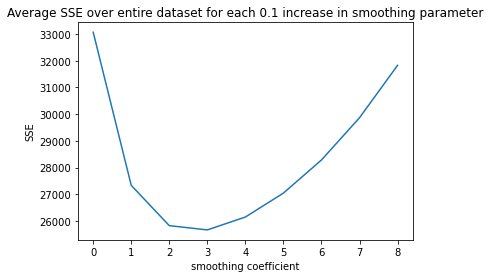

In [243]:
plt.plot(best_smoothing.apply(lambda x: np.mean(x),axis=1))
plt.title('Average SSE over entire dataset for each 0.1 increase in smoothing parameter')
plt.xlabel('smoothing coefficient')
plt.ylabel('SSE')
plt.plot()

c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)


42846.977913896306

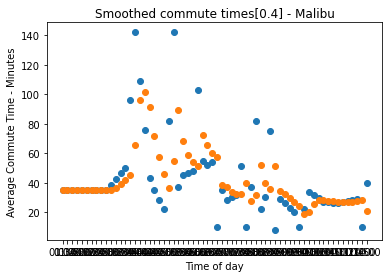

In [244]:
plt.scatter(morning.index,morning['Malibu'])
fit3 = SimpleExpSmoothing(morning['Malibu'], initialization_method="heuristic").fit(smoothing_level=0.4, optimized=False)
plt.scatter(morning.index,fit3.fittedvalues)
plt.title('Smoothed commute times[0.4] - Malibu')
plt.ylabel('Average Commute Time - Minutes')
plt.xlabel('Time of day')
plt.plot()
fit3.sse

In [245]:
smoothed_commutes  = morning.apply(lambda x: SimpleExpSmoothing(x, initialization_method="heuristic").fit(smoothing_level=0.5, optimized=False).fittedvalues)
smoothed_commutes

c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequenc

,Baldwin Park,Westlake Village,North Hollywood,Van Nuys,Glassell Park,West Central,,Pasadena City,Arleta,Inglewood City,...,Wilshire,Westchester,West Adams,Long Beach City,Duarte,North Sherman Oaks,Mid,Santa Clarita City,Gardena,La Verne
01:30,107.222222,35.000000,177.155556,40.333333,13.488889,10.333333,30.600000,45.000000,10.822222,23.333333,...,94.466667,10.000000,12.222222,175.333333,107.222222,40.333333,94.466667,67.022222,17.133333,25.333333
01:40,124.611111,35.000000,159.577778,42.666667,9.244444,12.666667,27.800000,45.000000,11.911111,26.666667,...,92.233333,10.000000,16.111111,158.666667,124.611111,42.666667,92.233333,62.511111,18.066667,27.666667
01:50,114.138889,35.000000,150.788889,43.833333,11.122222,13.833333,26.400000,45.000000,12.455556,31.666667,...,88.883333,10.000000,18.055556,150.333333,114.138889,43.833333,88.883333,60.255556,18.533333,28.833333
02:00,89.736111,35.000000,146.394444,44.416667,16.061111,14.416667,25.700000,45.000000,12.727778,37.500000,...,84.975000,10.000000,19.027778,146.166667,89.736111,44.416667,84.975000,59.127778,18.766667,29.416667
02:10,58.368056,35.000000,144.197222,44.708333,22.530556,14.708333,25.350000,45.000000,12.863889,43.750000,...,80.787500,10.000000,19.513889,144.083333,58.368056,44.708333,80.787500,58.563889,18.883333,29.708333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11:20,23.081687,26.590602,22.839474,40.749295,34.769101,25.541620,25.816113,29.240536,18.646047,44.371711,...,31.488193,28.075619,46.049921,58.698903,23.081687,40.749295,31.488193,43.445757,18.360945,14.039512
11:30,24.540843,27.045301,23.253070,39.707981,32.384550,27.770810,25.408056,27.120268,19.156357,74.019189,...,34.994096,17.037810,50.691627,50.182785,24.540843,39.707981,34.994096,50.722879,26.513806,10.769756
11:40,28.270422,27.647650,24.126535,40.853990,38.692275,21.385405,23.704028,41.560134,20.578178,108.009594,...,33.497048,17.518905,55.345814,37.591392,28.270422,40.853990,33.497048,53.361439,36.256903,10.384878
11:50,21.635211,28.323825,24.563268,43.926995,39.846138,16.942702,14.352014,24.780067,18.289089,108.004797,...,24.248524,19.426119,52.339573,33.462363,21.635211,43.926995,24.248524,55.347386,34.961785,8.692439


Now we will use GeoLocation to determine the latitude and longitude of our neighborhoods

In [246]:
import geopy
from geopy.geocoders import GeoNames
gn = GeoNames(username='matthew.rand')

In [247]:
def get_lat_long(city_name):
    locale = "{} California USA".format(city_name)
    place = gn.geocode(locale)
    if place != None:
        return place[1][::-1]
    else:
        return None

def convert_to_geo(lat_long):
    return geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(lat_long[0],lat_long[1]))

commute_statistics = pd.DataFrame(index=smoothed_commutes.columns)
commute_statistics['Average Commute'] = smoothed_commutes.apply(lambda x: np.mean(x))
commute_statistics['Variation in Commute Time'] = smoothed_commutes.apply(lambda x: np.std(x))


centroids = []
for index in commute_statistics.index.to_list():
    centroids.append( get_lat_long(index))
commute_statistics['Lat_long'] = centroids

commute_statistics= commute_statistics.dropna(subset = ['Lat_long'])
commute_statistics['Latitude'] = commute_statistics['Lat_long'].apply(lambda x: x[0])
commute_statistics['Longitude'] = commute_statistics['Lat_long'].apply(lambda x: x[1])


geo_df = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(commute_statistics['Latitude'],commute_statistics['Longitude']))
geo_df['name'] = commute_statistics.index
geo_df = geo_df.merge(commute_statistics, left_on='name',right_on=commute_statistics.index)

In [248]:
# load LA neighborhood geo data
geojson_file_loc = "data/mapping-la-data-main/geojson/la-county-neighborhoods-v6.geojson"
geo_la_neighborhood = geopandas.read_file(geojson_file_loc)
# LA EPSG transformation
# geo_la_neighborhood = geo_la_neighborhood.to_crs('EPSG:3395')
geo_la_neighborhood["area"] = geo_la_neighborhood.area
geo_la_neighborhood['boundary'] = geo_la_neighborhood.boundary
geo_la_neighborhood['centroid'] = geo_la_neighborhood.centroid
# load LA neighborhood poplulation data
pop_la_neighborhood = pd.read_csv('data/la-neighborhood-population.csv')
# merge two dataframe together
df = geo_la_neighborhood.merge(pop_la_neighborhood, left_on='name', right_on='Neighborhood', how='inner')
del df['Neighborhood']
del df['kind']
del df['external_id']
del df['slug']
del df['set']
del df['metadata']
del df['resource_uri']
df = df.rename(columns={'Population per Sqmi':'pop_density'})

C:\Users\mcran\AppData\Local\Temp\ipykernel_13284\1842084680.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_la_neighborhood["area"] = geo_la_neighborhood.area
C:\Users\mcran\AppData\Local\Temp\ipykernel_13284\1842084680.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_la_neighborhood['centroid'] = geo_la_neighborhood.centroid


In [249]:
df_final = df.merge(geo_df,left_on='name',right_on='name')
del df_final['centroid_y']
del df_final['geometry_y']

df_final

KeyError: 'centroid_y'

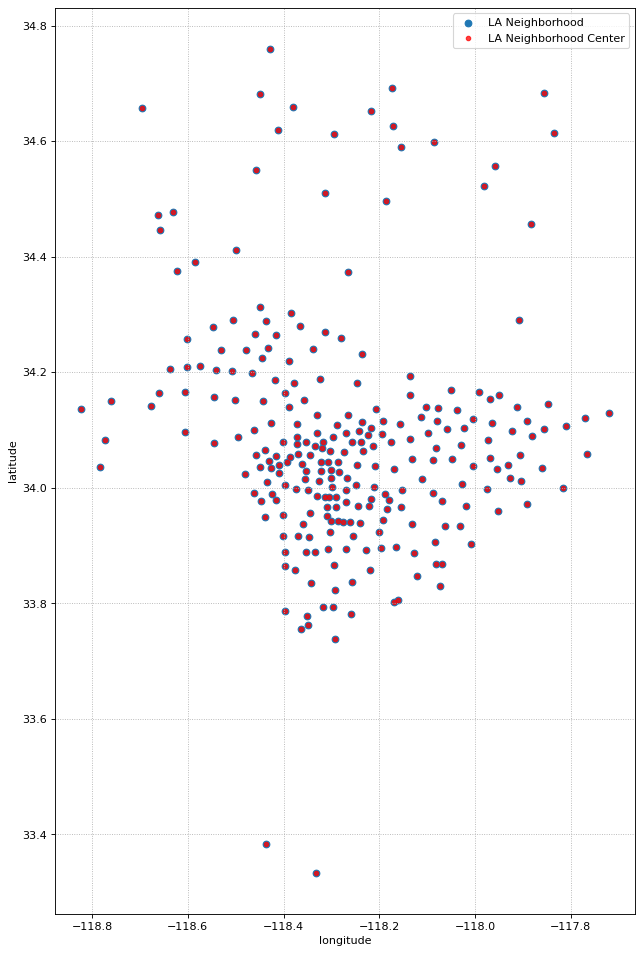

In [ ]:
fig, ax = plt.subplots(figsize=(15,15), dpi=80)
df.plot(ax=ax, label='LA Neighborhood')
c = geopandas.GeoDataFrame(df, geometry=df['centroid'])
c.plot(ax=ax, color='red',alpha=0.75, markersize=16, label='LA Neighborhood Center')
#ax.scatter(df_vertiport_la['SHAPE_X'], df_vertiport_la['SHAPE_Y'], s=16, edgecolors='orange', alpha=0.75, label='Existing Vertiport Location')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.legend()
ax.grid(linestyle=':')

Text(0, 0.5, 'Average Commute time [mins]')

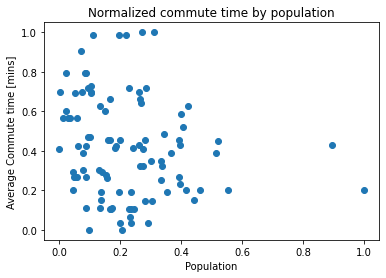

In [ ]:
from sklearn import preprocessing
pop = df_final['pop_density']
norm_pop = (pop-pop.min()) / (pop.max() - pop.min())
norm_commute = (df_final['Average Commute']-df_final['Average Commute'].min()) / (df_final['Average Commute'].max() - df_final['Average Commute'].min())

plt.scatter(norm_pop,norm_commute)
plt.title('Normalized commute time by population')
plt.xlabel('Population')
plt.ylabel('Average Commute time [mins]')

Text(0, 0.5, 'Average Commute time [mins]')

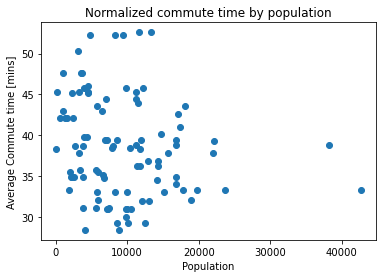

In [250]:
from sklearn import preprocessing
pop = df_final['pop_density']
norm_pop = (pop-pop.min()) / (pop.max() - pop.min())
norm_commute = (df_final['Average Commute']-df_final['Average Commute'].min()) / (df_final['Average Commute'].max() - df_final['Average Commute'].min())

plt.scatter(pop,df_final['Average Commute'])
plt.title('Normalized commute time by population')
plt.xlabel('Population')
plt.ylabel('Average Commute time [mins]')

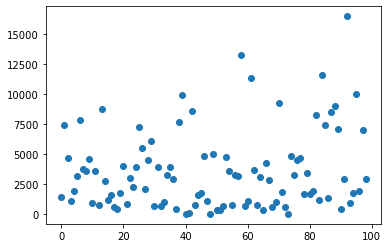

In [258]:
plt.scatter(range(len(pop)),pop*norm_commute)

In [259]:
import geopandas
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [308]:

# load LA neighborhood geo data
geojson_file_loc = "data/mapping-la-data-main/geojson/la-county-neighborhoods-v6.geojson"
geo_la_neighborhood = geopandas.read_file(geojson_file_loc)
# LA EPSG transformation
# geo_la_neighborhood = geo_la_neighborhood.to_crs('EPSG:3395')
geo_la_neighborhood["area"] = geo_la_neighborhood.area
geo_la_neighborhood['boundary'] = geo_la_neighborhood.boundary
geo_la_neighborhood['centroid'] = geo_la_neighborhood.centroid
# load LA neighborhood poplulation data
pop_la_neighborhood = pd.read_csv('data/la-neighborhood-population.csv')
# merge two dataframe together
df = geo_la_neighborhood.merge(pop_la_neighborhood, left_on='name', right_on='Neighborhood', how='inner')
del df['Neighborhood']
del df['kind']
del df['external_id']
del df['slug']
del df['set']
del df['metadata']
del df['resource_uri']
df = df.rename(columns={'Population per Sqmi':'pop_density'})

C:\Users\mcran\AppData\Local\Temp\ipykernel_13284\198325543.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_la_neighborhood["area"] = geo_la_neighborhood.area
C:\Users\mcran\AppData\Local\Temp\ipykernel_13284\198325543.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_la_neighborhood['centroid'] = geo_la_neighborhood.centroid


In [309]:
# load LA existing vertiport data
df_heliport = pd.read_csv('data/us-heliports-landing-facilities.csv')
del df_heliport['State_Name']
del df_heliport['Facility_Type']
del df_heliport['County_s_State_Post_Office_Code']
df_airport = pd.read_csv('data/us-general-aviation-airports.csv')
del df_airport['County_s_State_Post_Office_Code']
del df_airport['State_Name']
df_vertiport = pd.concat([df_heliport, df_airport])
mask = (df_vertiport['SHAPE_X'] <-117.6) & (df_vertiport['SHAPE_X'] > -119) & (df_vertiport['SHAPE_Y'] <34.8) & (df_vertiport['SHAPE_Y'] > 33.6)
df_vertiport_la = df_vertiport[mask]

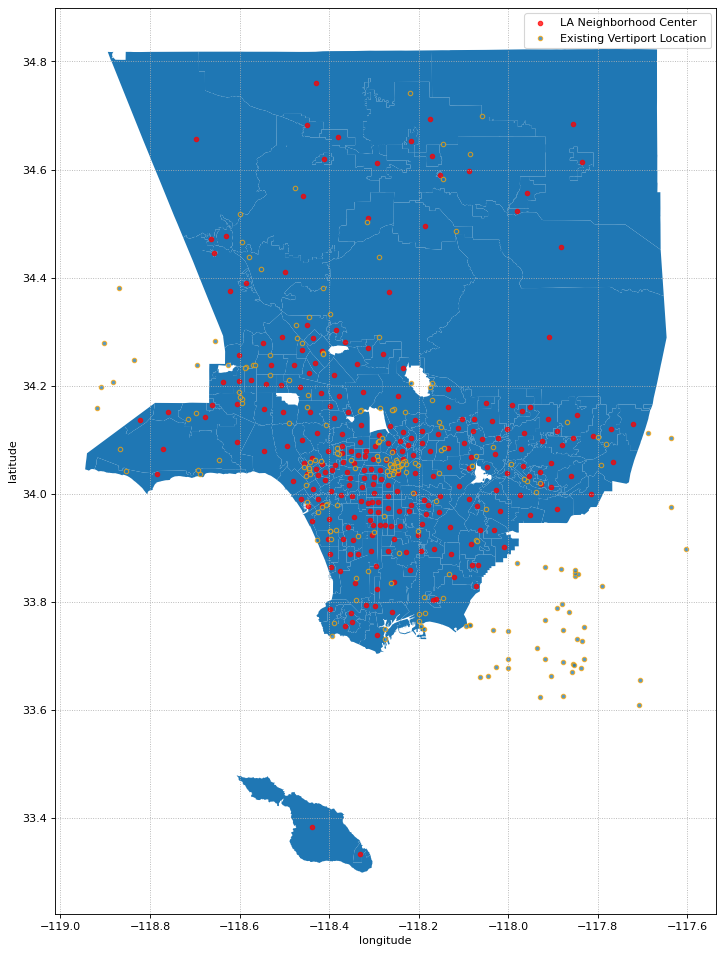

In [310]:

fig, ax = plt.subplots(figsize=(15,15), dpi=80)
df.plot(ax=ax, label='LA Neighborhood')
c = geopandas.GeoDataFrame(df, geometry=df['centroid'])
c.plot(ax=ax, color='red',alpha=0.75, markersize=16, label='LA Neighborhood Center')
ax.scatter(df_vertiport_la['SHAPE_X'], df_vertiport_la['SHAPE_Y'], s=16, edgecolors='orange', alpha=0.75, label='Existing Vertiport Location')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.legend()
ax.grid(linestyle=':')

In [319]:
df_centroid

,name,centroid,pop_density,idx
0,Acton,POINT (-118.18576 34.49558),166,0
1,Adams-Normandie,POINT (-118.30031 34.03136),21848,1
2,Agoura Hills,POINT (-118.76056 34.15109),2495,2
3,Agua Dulce,POINT (-118.31239 34.51067),99,3
4,Alhambra,POINT (-118.13547 34.08399),11275,4
...,...,...,...,...
256,Willowbrook,POINT (-118.25493 33.91644),9117,256
257,Wilmington,POINT (-118.25986 33.78074),5636,257
258,Windsor Square,POINT (-118.31990 34.06909),8255,258
259,Winnetka,POINT (-118.57524 34.21061),9826,259


In [321]:
from scipy.sparse import csr_matrix
df_centroid = pd.DataFrame(df[['name','centroid','pop_density']])
n = len(df_centroid)
df_centroid['idx'] = df_centroid.index
# Cartesian product to calculate distance between all centroid pairs
centroid_pair = df_centroid.merge(df_centroid, how='cross')
centroid_pair['distance']=centroid_pair.apply(lambda x: x['centroid_x'].distance(x['centroid_y']), axis=1)
centroid_pair['total_pop']=centroid_pair.apply(lambda x: x['pop_density_x'] + x['pop_density_y'], axis=1)
# distance matrix
D = csr_matrix((centroid_pair['distance'], (centroid_pair['idx_x'], centroid_pair['idx_y'])), shape=(n,n))
# population matrix
P = csr_matrix((centroid_pair['total_pop'], (centroid_pair['idx_x'], centroid_pair['idx_y'])), shape=(n,n))
P = P / np.max(P)

c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarn

Text(0.5, 1.0, 'Find elbow point for K')

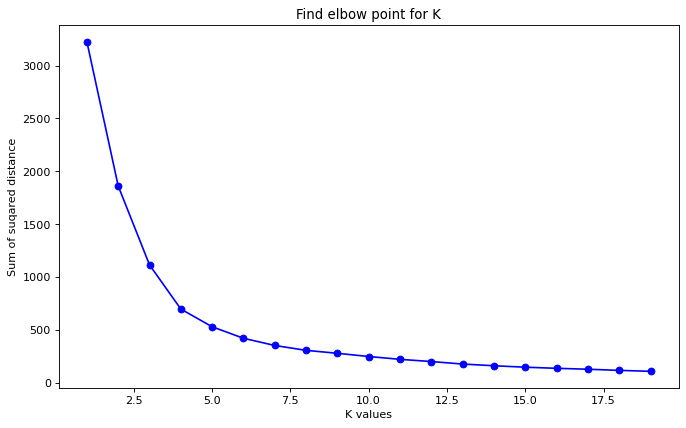

In [281]:
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
embedding = Isomap(n_neighbors=10,n_components=2)
D_transformed = embedding.fit_transform(D)

sum_of_squared_distiance=[]
K = range(1,20)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(D_transformed)
    sum_of_squared_distiance.append(kmeans.inertia_)
fig, ax = plt.subplots(1,1,figsize=(10,6), dpi=80)
ax.plot(K,sum_of_squared_distiance,'bo-')
ax.set_xlabel('K values')
ax.set_ylabel('Sum of suqared distance')
ax.set_title('Find elbow point for K')

c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mcran\anaconda3\envs\geo_env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


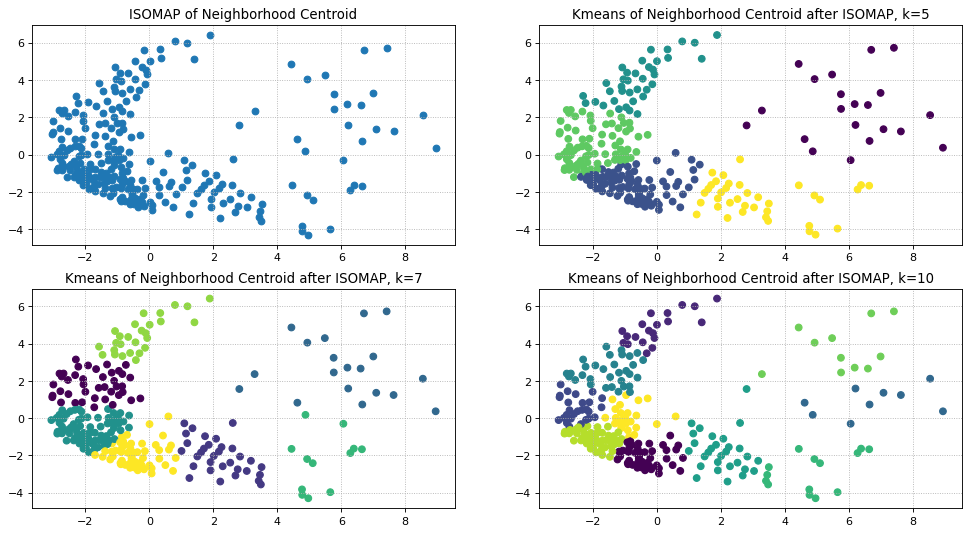

In [282]:


fig, ax = plt.subplots(2,2,figsize=(15,8), dpi=80)
ax[0,0].scatter(D_transformed[:,0], D_transformed[:,1])
ax[0,0].set_title('ISOMAP of Neighborhood Centroid')
ax[0,0].grid(linestyle=':')

kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(D_transformed)
kmeans_7 = KMeans(n_clusters=7, random_state=0).fit(D_transformed)
kmeans_10 = KMeans(n_clusters=10, random_state=0).fit(D_transformed)
ax[0,1].scatter(D_transformed[:,0], D_transformed[:,1], c=kmeans_5.labels_)
ax[0,1].set_title('Kmeans of Neighborhood Centroid after ISOMAP, k=5')
ax[0,1].grid(linestyle=':')
ax[1,0].scatter(D_transformed[:,0], D_transformed[:,1], c=kmeans_7.labels_)
ax[1,0].set_title('Kmeans of Neighborhood Centroid after ISOMAP, k=7')
ax[1,0].grid(linestyle=':')
ax[1,1].scatter(D_transformed[:,0], D_transformed[:,1], c=kmeans_10.labels_)
ax[1,1].set_title('Kmeans of Neighborhood Centroid after ISOMAP, k=10')
ax[1,1].grid(linestyle=':')

In [ ]:
from pulp import *
import pandas as pd

data = pd.read_csv("data/cluster.csv", header=0)


# only existing vertiport and total profit columns
clusterName = data['label']
dataTable = data.iloc[:, -3:].values.tolist()
print(dataTable)

n_Ve = dict([(i, n[0]) for i, n in enumerate(dataTable)])
total_commute = dict([(i, n[1]) for i, n in enumerate(dataTable)])
total_prof = dict([(i, n[2]) for i, n in enumerate(dataTable)])

prob = LpProblem('MaxProfit', LpMinimize)

# number of existing vertiport
n_eVTOL_Vars = LpVariable.dicts('n_eVTOL', clusterName, 0, cat='Integer')
# number of new vertiport
n_Vn_Vars = LpVariable.dicts('n_Vn', clusterName, 0, cat='Integer')

n_round = 3
c_eVTOL = 100000.0
c_Ve = 12000.0
c_Vn = 200000.0
cap_eVTOL = 4.0
cap_port = 8.0
depreciation_1 = 1/365
depreciation_10 = 1/365/10
depreciation_20 = 1/365/20

# Objection function
prob += lpSum([- total_prof[i] + c_eVTOL * n_eVTOL_Vars[i]*depreciation_10 + c_Ve * n_Ve[i]*depreciation_1 + c_Vn *
               n_Vn_Vars[i] * depreciation_20 for i in clusterName]), 'Total Profit'

# Constraint
for i in clusterName:
    prob += cap_eVTOL * n_eVTOL_Vars[i] * n_round >= total_commute[i]
    prob += cap_port * (n_Ve[i] + n_Vn_Vars[i]) >= n_eVTOL_Vars[i]

prob.solve()

print()

for var in prob.variables():
    print(str(var) + ' : ' + str(var.varValue))
print()

print("Total profit = $%.2f" % value(-prob.objective))
# res_dict = {'new_vertiport': [var.varValue[:10] for var in prob.variables()],
#             'eVTOL#': [var.varValue[10:] for var in prob.variables()]}
# res = pd.DataFrame(res_dict)
res = [var.varValue for var in prob.variables()]
res_df = pd.DataFrame(columns=['new_vertiport', 'eVTOL#'])
res_df['new_vertiport'] = res[:10]
res_df['eVTOL#'] = res[10:]
res_df.to_csv('data/optimization_result.csv', index=False)